## Based on the given financial data create a ML model to predict if the client is high risk or low risk if we were to provide them loan. We need to predict the column Risk_Flag and it contains value 1 if the client is high risk else it will be 0.

In [1]:
import pandas as pd

In [2]:
import json

# Specify the path to your JSON file
file_path = 'loan_approval_dataset.json'

# Open the JSON file and load its content
with open(file_path, 'r') as file:
    data = json.load(file)

# Now 'data' contains the JSON data as a Python dictionary
print(data)


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [6]:
df = pd.DataFrame(data)

In [7]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [8]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Data overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 35.0+ MB
None
                  Id        Income            Age     Experience  \
count  252000.000000  2.520000e+05  252000.000000 

In [14]:

# Check for missing values
print(df.isnull().sum())

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64


## Data Exploration and Visualization: Understand the data through descriptive statistics and visualizations.

<Axes: title={'center': 'missing Values visualization in the dataset'}>

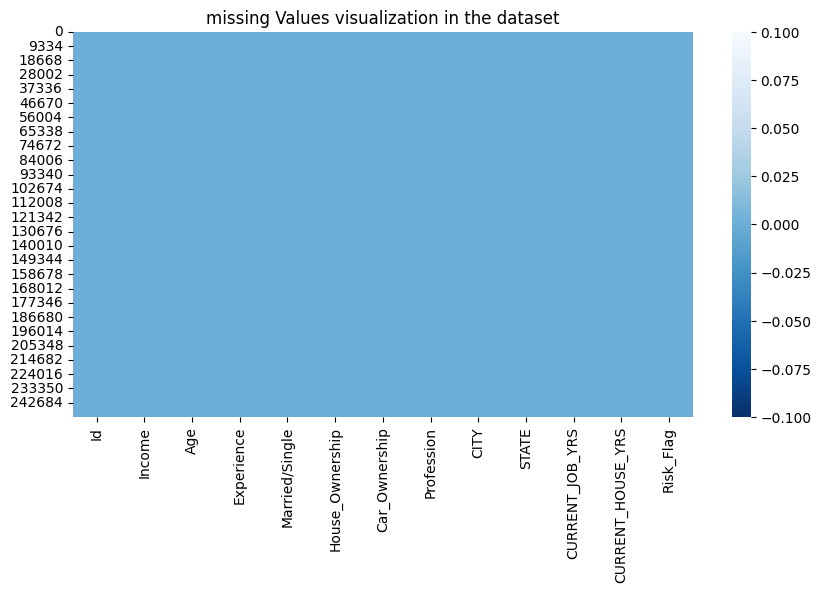

In [18]:
# To visualize the missing data we can use matplotlib

plt.figure(figsize = (10,5))
plt.title ("missing Values visualization in the dataset")
sns.heatmap(df.isnull(), cbar =True, cmap= "Blues_r")

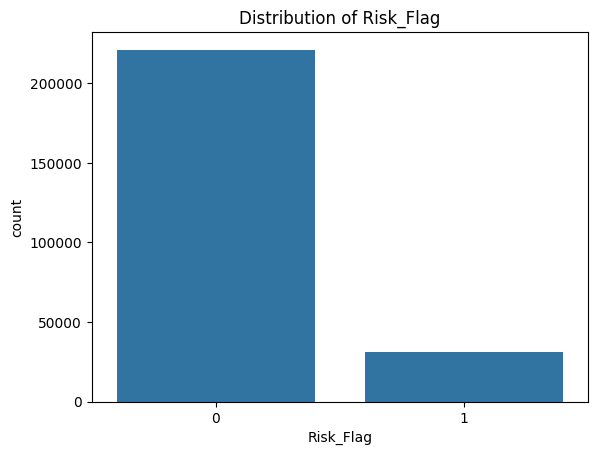

In [12]:
# Visualize the distribution of Risk_Flag
sns.countplot(x='Risk_Flag', data=df)
plt.title('Distribution of Risk_Flag')
plt.show()

In [15]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

#There is no any null values in the given data set

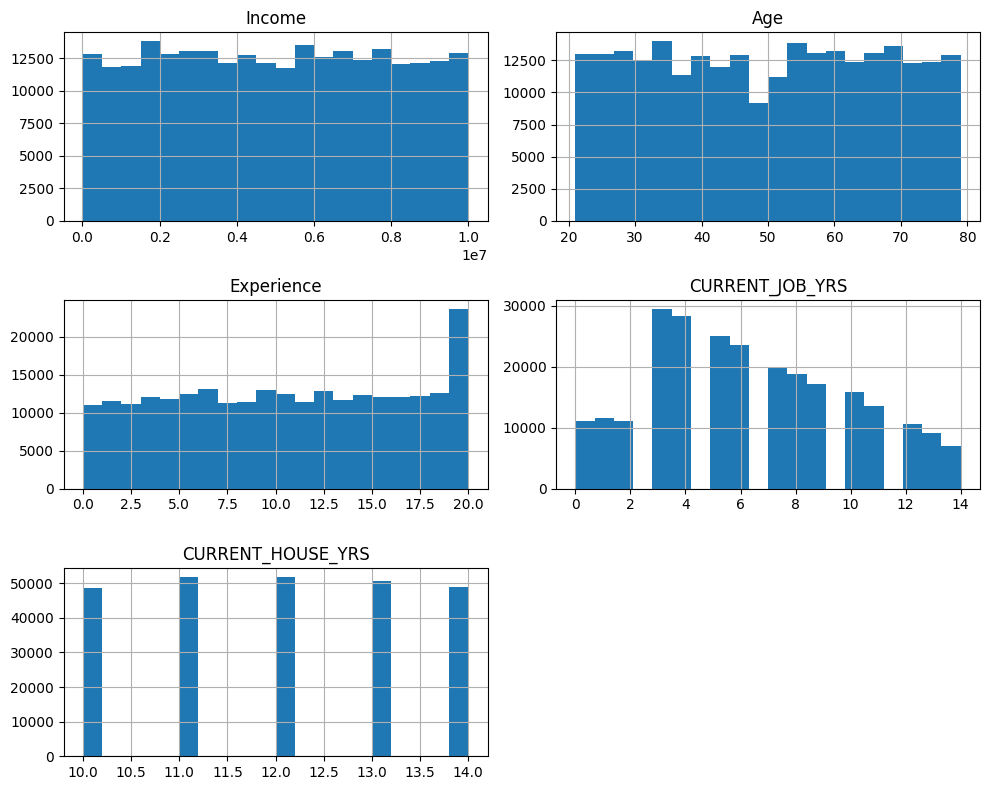

In [24]:
 # Plot distributions of numerical features
numerical_features = ['Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS']
df[numerical_features].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Risk_factor')

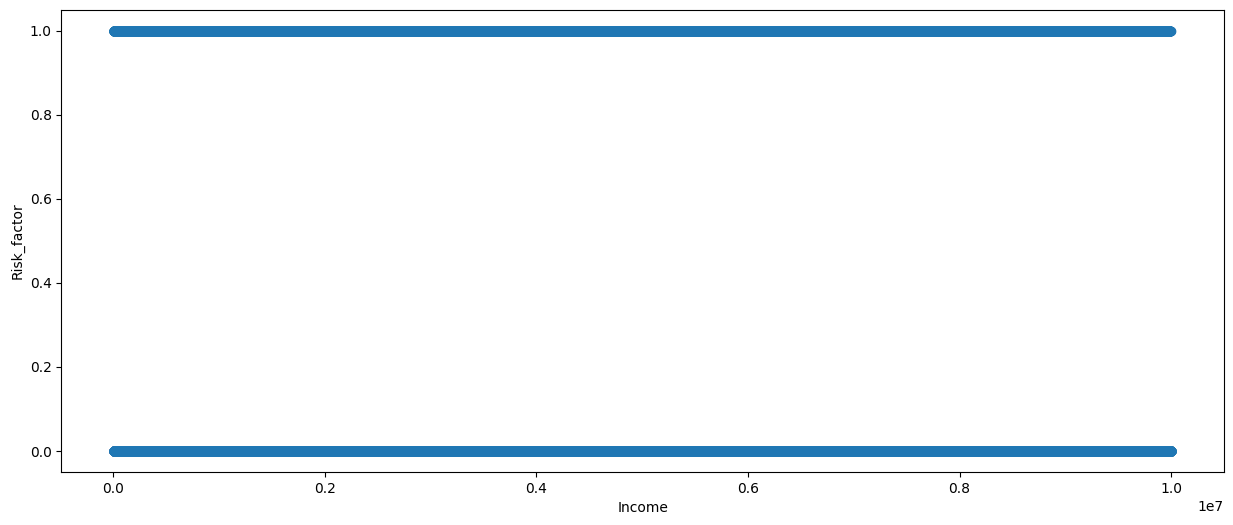

In [19]:
plt.figure(figsize=(15,6))
plt.scatter(x='Income',y='Risk_Flag',data=df)
plt.xlabel('Income')
plt.ylabel('Risk_factor')

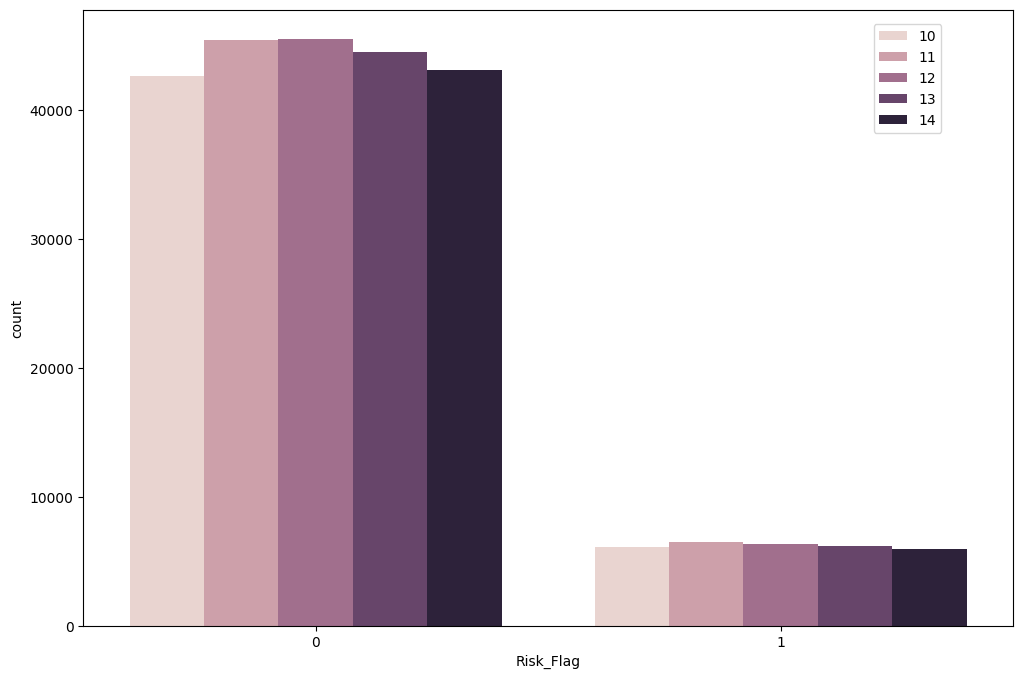

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(x='Risk_Flag',data=df,hue='CURRENT_HOUSE_YRS')
plt.legend(loc=[0.85,0.8])

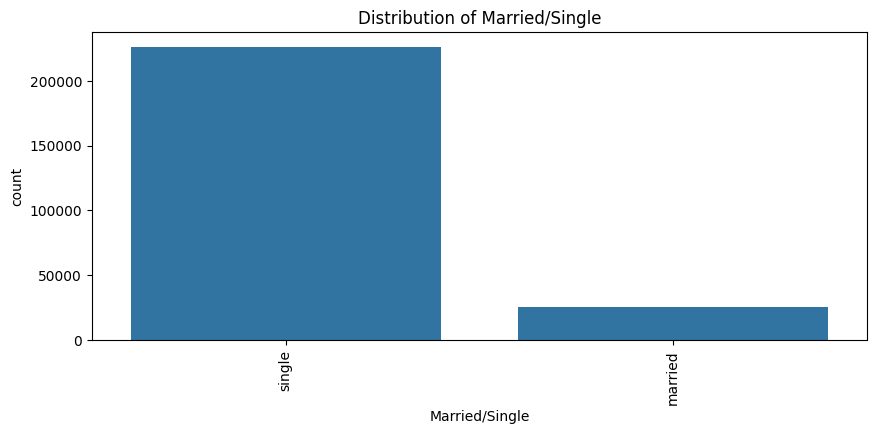

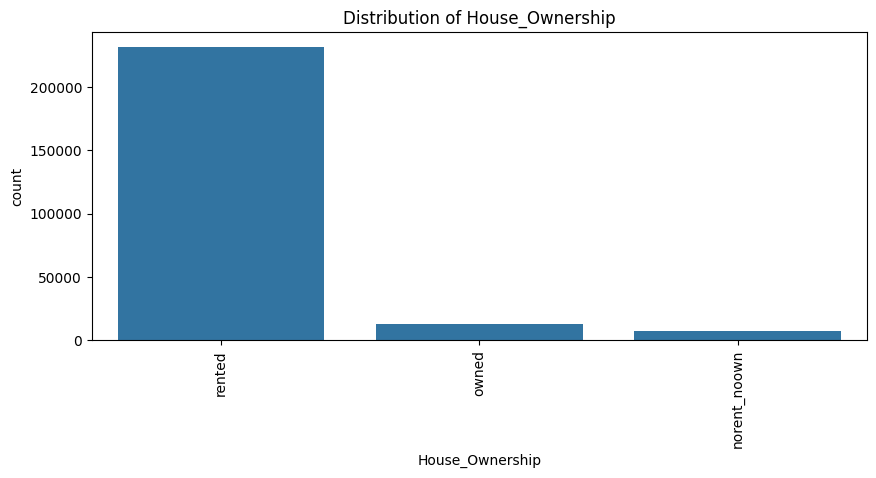

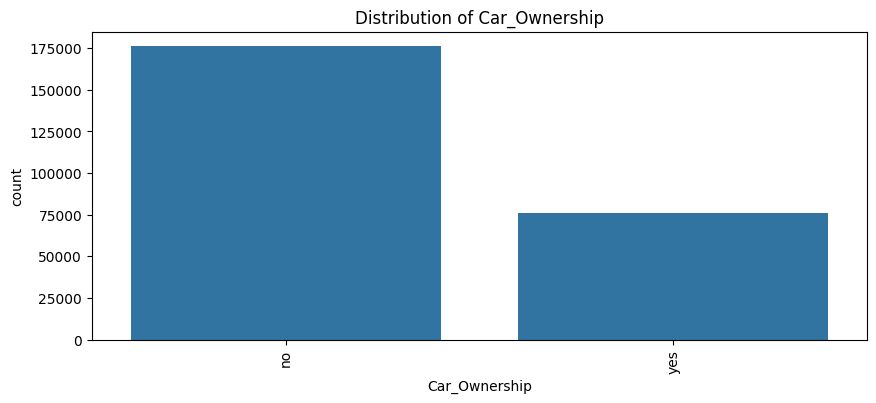

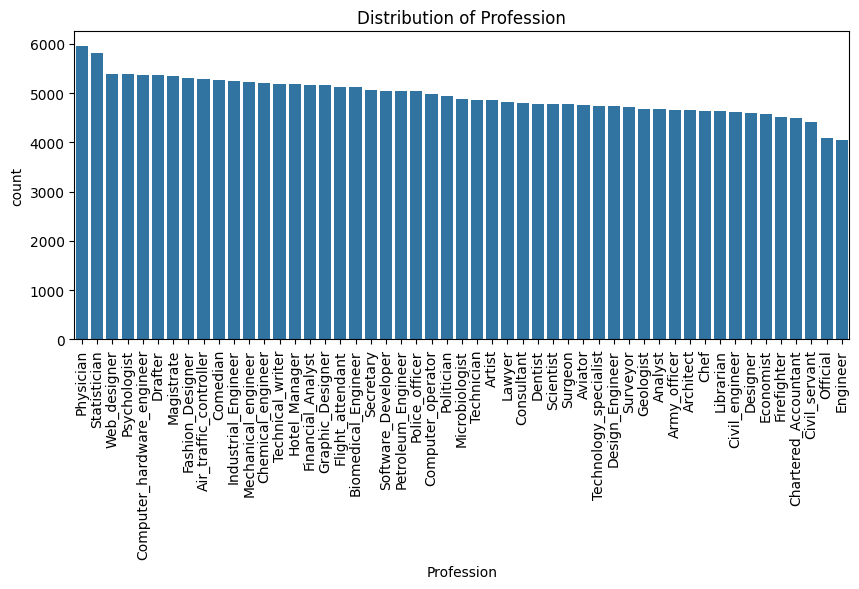

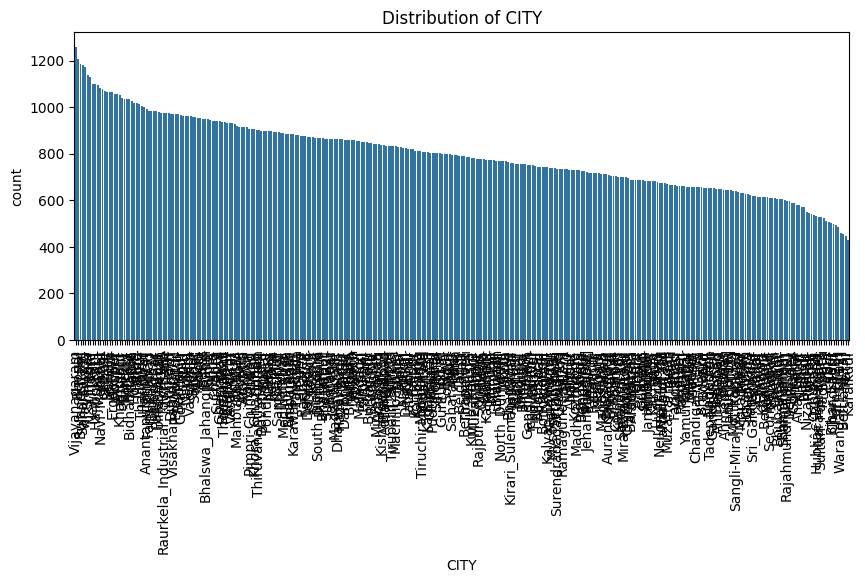

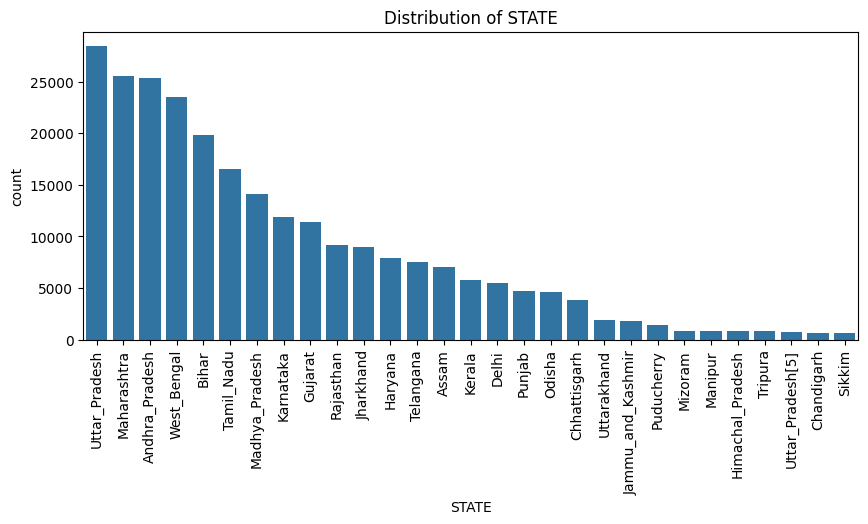

In [25]:
# Plotting categorical features
categorical_features = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
for feature in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, data=df, order=df[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {feature}')
    plt.show()

## Data Preprocessing and Feature Engineering: Clean the data, handle missing values, encode categorical features

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [28]:
# Encode categorical variables
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

In [29]:
df.head

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,251,13,3,13,0
1,2,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3,3991815,66,4,0,2,0,47,8,12,4,10,0
3,4,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5,5768871,47,11,1,2,0,11,296,22,3,14,1


## Variable Selection for training and testing
Variables can be selected based on:

Domain Knowledge: Understanding which features are likely to influence fraud.

Feature Importance: Using models like Random Forest which provide feature importance scores.

Correlation Analysis: Ensuring features have a reasonable correlation with the target variable without being highly correlated with each other. for training and testing.

Following are the variable that are need which is also call as independent variable i.e X and Y is the variable which is depend on all indeprendent variable so it is also called as target variable

In [30]:
X = df.drop(['Id', 'Risk_Flag'], axis=1)
y = df['Risk_Flag']

In [32]:
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,1,2,0,33,251,13,3,13
1,7574516,40,10,1,2,0,43,227,14,9,13
2,3991815,66,4,0,2,0,47,8,12,4,10
3,6256451,41,2,1,2,1,43,54,17,2,12
4,5768871,47,11,1,2,0,11,296,22,3,14


In [33]:
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Risk_Flag, dtype: int64

## Model Building: Train various machine learning models to predict the Risk_Flag.

In [34]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
X_train.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
200471,9121364,70,18,1,2,0,4,270,20,3,11
92611,2636544,39,0,1,2,0,13,311,22,0,11
86397,1010539,39,9,1,2,0,42,123,23,4,13
110500,3897430,21,2,1,2,0,48,295,1,2,12
185133,9470213,41,5,1,0,1,50,56,11,5,13


In [37]:
X_test.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
75255,4260981,47,18,1,2,0,39,118,0,7,13
192435,8529345,44,2,1,2,0,13,210,0,2,10
154839,7848654,55,9,1,2,0,43,229,2,9,13
59774,8491491,61,20,1,2,0,12,114,28,8,11
63788,1537266,78,13,1,2,0,50,73,22,9,12


## Model Evaluation: Evaluate the performance of the models using appropriate metrics.

In [38]:
# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [42]:
X_train[numerical_features].head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
200471,1.430422,1.170436,1.318759,-0.914084,-0.712569
92611,-0.820701,-0.644922,-1.680840,-1.736837,-0.712569
86397,-1.385148,-0.644922,-0.181041,-0.639833,0.717243
110500,-0.383000,-1.699001,-1.347551,-1.188335,0.002337
185133,1.551521,-0.527803,-0.847618,-0.365582,0.717243


In [41]:
X_test[numerical_features].head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
75255,-0.256798,-0.176443,1.318759,0.182920,0.717243
192435,1.224910,-0.352123,-1.347551,-1.188335,-1.427475
154839,0.988617,0.292037,-0.181041,0.731422,0.717243
59774,1.211770,0.643396,1.652048,0.457171,-0.712569
63788,-1.202301,1.638915,0.485537,0.731422,0.002337


## Model Selection.

In [43]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [46]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
Model Performance

In [47]:
model.score(X_test,y_test)

0.8985119047619048

## Model Prediction

In [52]:
model.predict([[0,47,18,1,2,0,39,118,0,7,13]])

C:\Users\sai\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)